## MNIST Dataset

In [1]:
from qml_ssl.data import create_data_loader, load_mnist_img
from qml_ssl.models.img_classical import Conv_Classifier, Conv_SupContrastive,  LinearProbe
from qml_ssl.utils.plotting import generate_embeddings, vmf_kde_on_circle, pca_proj, tsne_proj, plot_training
from qml_ssl.utils.training import get_trainer

import warnings

# Ignore all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

### 1. Binary Classification

In [2]:
classes = (0, 1)
reduced_dim = 16

mnist_data = load_mnist_img(classes=classes, reduced_dim=reduced_dim)

train_loader = create_data_loader(mnist_data["train_data"], mnist_data["train_labels"])
val_loader = create_data_loader(mnist_data["test_data"], mnist_data["test_labels"], shuffle=False)

Train dataset size: 11774
Test dataset size: 1954


#### Classification with Cross-Entropy 

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_classifier_mnist_01/version_6


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/50f850476ff94bb6959380b8257af643

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                   | Type               | Params | Mode 
-----------------------------------------------------------------------
0  | encoder                | ConvEncoder        | 696    | train
1  | encoder.layers         | ModuleList         | 696    | train
2  | encoder.layers.0       | ConvUnit           | 96     | train
3  | encoder.layers.0.conv  | Conv2d             | 80     | train
4  | encoder.layers.0.bn    | BatchNorm2d        | 16     | train
5  | encoder.layers.0.activ | ReLU               | 0      | train
6  | encoder.layers.0.pool  | MaxPool2d          | 0      | train
7  | encoder.layers.1       | ConvUnit           | 600    | train
8  | encoder.layers.1.conv  | Conv2d             | 584    | train
9  | encoder.layers.1.bn    | BatchNorm2d        | 16     | train
10 | enco

Epoch 19: 100%|██████████| 184/184 [00:03<00:00, 55.47it/s, v_num=f643, valid_loss=0.0132, valid_acc=0.997, train_loss=0.00847, train_acc=0.998]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 184/184 [00:03<00:00, 55.34it/s, v_num=f643, valid_loss=0.0132, valid_acc=0.997, train_loss=0.00847, train_acc=0.998]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_classifier_mnist_01
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/50f850476ff94bb6959380b8257af643
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.8774418234825134, 0.9978767037391663)
COMET INFO:     train_loss [20] : (0.008466691710054874, 0.43586063385009766)
COMET INFO:     valid_acc [20]  : (0.9657113552093506, 0.9969293475151062)
COMET INFO:     valid_loss [20] : (0.010769996792078018, 0.21021832525730133)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_classifier_mnist_01
COMET INFO:  

Embeddings after Training


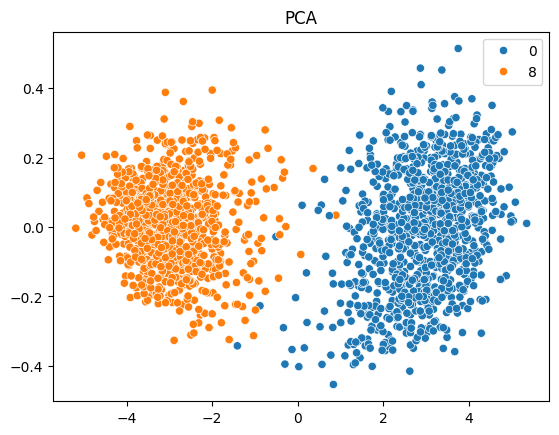

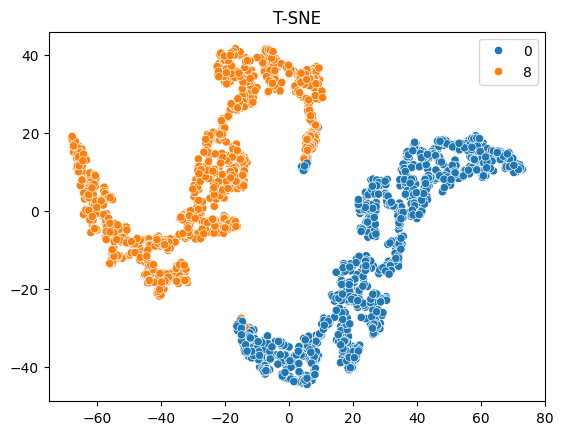

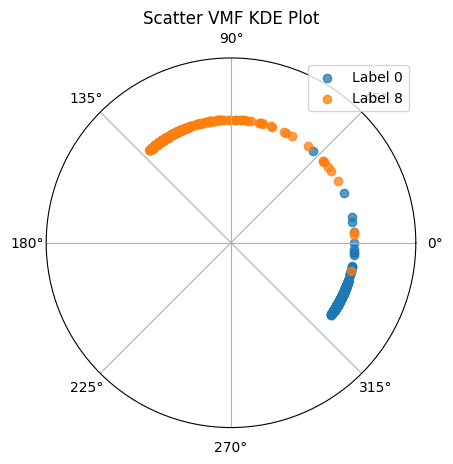

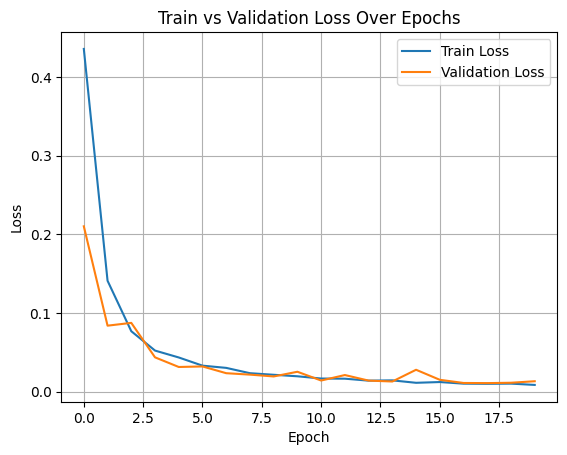

In [3]:
model = Conv_Classifier(proj_dim=2, classes=classes, lr=1e-3)

# print("Embeddings before Training")
# embeddings, labels = generate_embeddings(model, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_classifier_mnist_01", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(log_dir)

#### Supervised Contrastive Representation Learning

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_supcontrast_mnist_01/version_5


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/37430462ec394d3c8c03a62c4ad13cc6

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                           | Type              | Params | Mode 
------------------------------------------------------------------------------
0  | encoder                        | ConvEncoder       | 696    | train
1  | encoder.layers                 | ModuleList        | 696    | train
2  | encoder.layers.0               | ConvUnit          | 96     | train
3  | encoder.layers.0.conv          | Conv2d            | 80     | train
4  | encoder.layers.0.bn            | BatchNorm2d       | 16     | train
5  | encoder.layers.0.activ         | ReLU              | 0      | train
6  | encoder.layers.0.pool          | MaxPool2d         | 0      | train
7  | encoder.layers.1               | ConvUnit          | 600    | train
8  | encoder.layers.1.conv          | Conv2d            | 584    | trai

Epoch 19: 100%|██████████| 184/184 [00:04<00:00, 42.11it/s, v_num=3cc6, valid_loss=0.208, train_loss=0.133]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 184/184 [00:04<00:00, 42.03it/s, v_num=3cc6, valid_loss=0.208, train_loss=0.133]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_supcontrast_mnist_01
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/37430462ec394d3c8c03a62c4ad13cc6
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [20] : (0.13262373208999634, 0.6560139656066895)
COMET INFO:     valid_loss [20] : (0.20512469112873077, 0.4990770220756531)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_supcontrast_mnist_01
COMET INFO:   Parameters:
COMET INFO:     activ_type         : relu
COMET INFO:     hidden_channel_num : 8
COMET INFO:     layer_num          : 2
COMET INFO:     los

Embeddings after Training


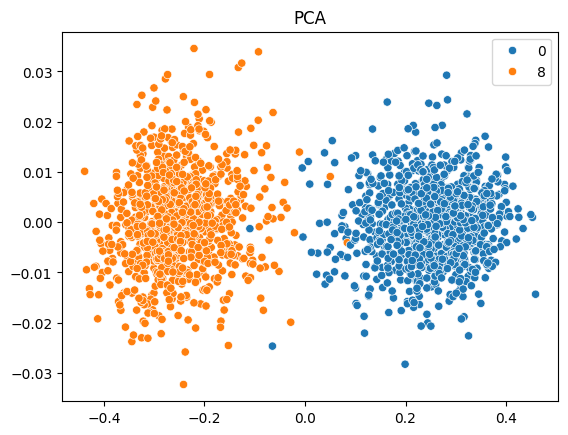

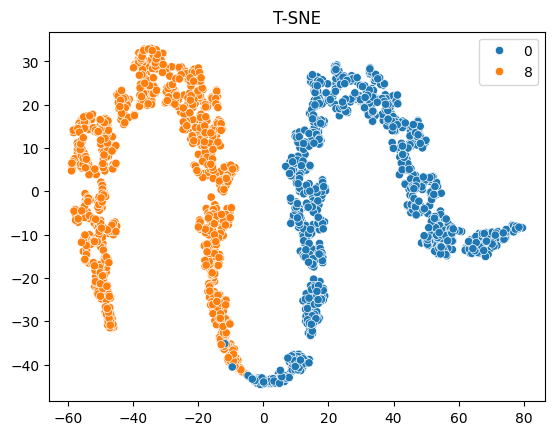

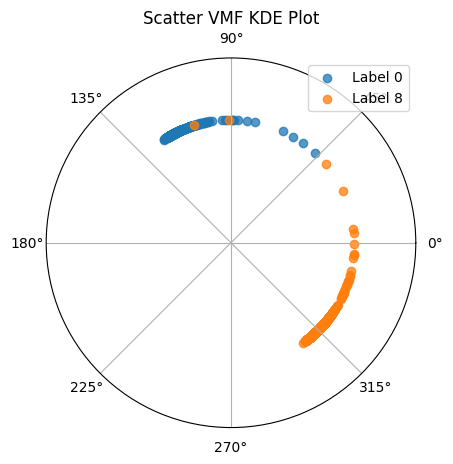

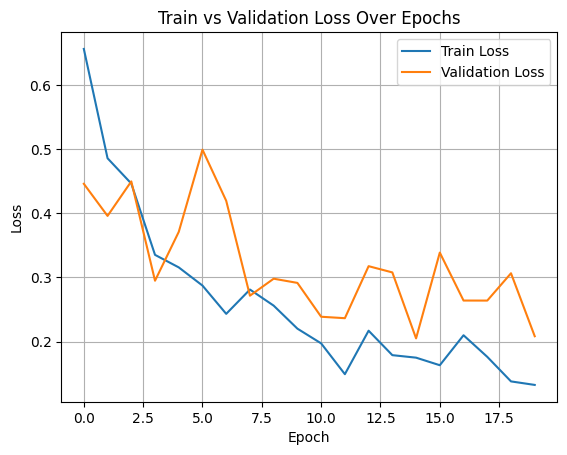

In [4]:
model = Conv_SupContrastive(proj_dim=2, lr=1e-3, loss="ContrastiveLoss")

# print("Embeddings before Training")
# embeddings, labels = generate_embeddings(model, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_supcontrast_mnist_01", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(log_dir)

We evaluate by linear probing with a simple MLP.

In [5]:
linear_probe = LinearProbe(pretrained_model=model, classes=classes, num_layers=1)

trainer, log_dir = get_trainer("probing_supcontrast_mnist_01", monitor_metric="valid_loss")
trainer.fit(linear_probe, train_loader, val_loader)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/probing_supcontrast_mnist_01/version_6


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/3749eb2b39b147e08991444b8fd93118

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                                            | Type                | Params | Mode 
-------------------------------------------------------------------------------------------------
0  | pretrained_model                                | Conv_SupContrastive | 714    | eval 
1  | pretrained_model.encoder                        | ConvEncoder         | 696    | eval 
2  | pretrained_model.encoder.layers                 | ModuleList          | 696    | eval 
3  | pretrained_model.encoder.layers.0               | ConvUnit            | 96     | eval 
4  | pretrained_model.encoder.layers.0.conv          | Conv2d              | 80     | eval 
5  | pretrained_model.encoder.layers.0.bn            | BatchNorm2d         | 16     | eval 
6  | pretrained_model.encoder.layers.0.activ         | ReLU      

Epoch 19: 100%|██████████| 184/184 [00:03<00:00, 57.47it/s, v_num=3118, valid_loss=0.178, valid_acc=0.997, train_loss=0.182, train_acc=0.999]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 184/184 [00:03<00:00, 57.01it/s, v_num=3118, valid_loss=0.178, valid_acc=0.997, train_loss=0.182, train_acc=0.999]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : probing_supcontrast_mnist_01
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/3749eb2b39b147e08991444b8fd93118
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.06998471170663834, 0.9991506934165955)
COMET INFO:     train_loss [20] : (0.18186785280704498, 0.7776628136634827)
COMET INFO:     valid_acc [20]  : (0.030194472521543503, 0.9974411725997925)
COMET INFO:     valid_loss [20] : (0.1781986653804779, 0.7411763668060303)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : probing_supcontrast_mnist_01
COMET I

### 2. Multiclass Classification

In [6]:
classes = list(range(10))
reduced_dim = 16

mnist_data = load_mnist_img(classes=classes, reduced_dim = reduced_dim)

train_loader = create_data_loader(mnist_data["train_data"], mnist_data["train_labels"])
val_loader = create_data_loader(mnist_data["test_data"], mnist_data["test_labels"], shuffle=False)

Train dataset size: 60000
Test dataset size: 10000


CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_classifier_mnist_all/version_3


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/f9bc1baa93594dcc885da12ba9bcd60c

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                   | Type               | Params | Mode 
-----------------------------------------------------------------------
0  | encoder                | ConvEncoder        | 696    | train
1  | encoder.layers         | ModuleList         | 696    | train
2  | encoder.layers.0       | ConvUnit           | 96     | train
3  | encoder.layers.0.conv  | Conv2d             | 80     | train
4  | encoder.layers.0.bn    | BatchNorm2d        | 16     | train
5  | encoder.layers.0.activ | ReLU               | 0      | train
6  | encoder.layers.0.pool  | MaxPool2d          | 0      | train
7  | encoder.layers.1       | ConvUnit           | 600    | train
8  | encoder.layers.1.conv  | Conv2d             | 584    | train
9  | encoder.layers.1.bn    | BatchNorm2d        | 16     | train
10 | enco

Epoch 19: 100%|██████████| 938/938 [00:16<00:00, 57.86it/s, v_num=d60c, valid_loss=0.183, valid_acc=0.943, train_loss=0.194, train_acc=0.941]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 938/938 [00:16<00:00, 57.80it/s, v_num=d60c, valid_loss=0.183, valid_acc=0.943, train_loss=0.194, train_acc=0.941]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_classifier_mnist_all
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/f9bc1baa93594dcc885da12ba9bcd60c
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.5673999786376953, 0.9408833384513855)
COMET INFO:     train_loss [20] : (0.19418442249298096, 1.3658674955368042)
COMET INFO:     valid_acc [20]  : (0.7684999704360962, 0.9430999755859375)
COMET INFO:     valid_loss [20] : (0.18310478329658508, 0.7367991209030151)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_classifier_mnist_all
COMET INFO:   P

Embeddings after Training


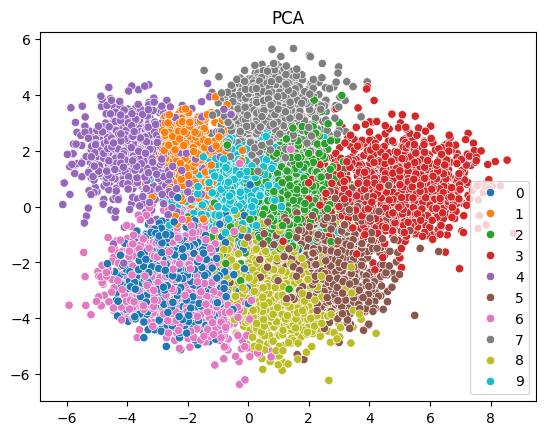

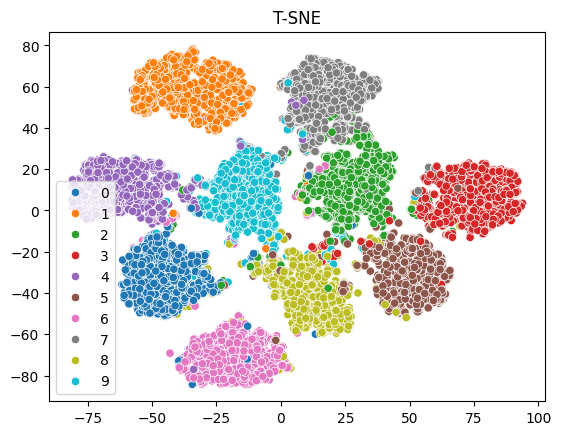

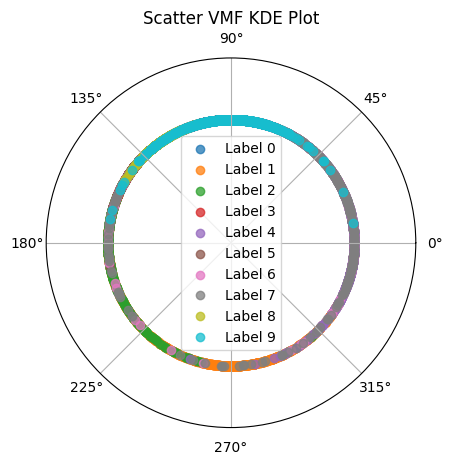

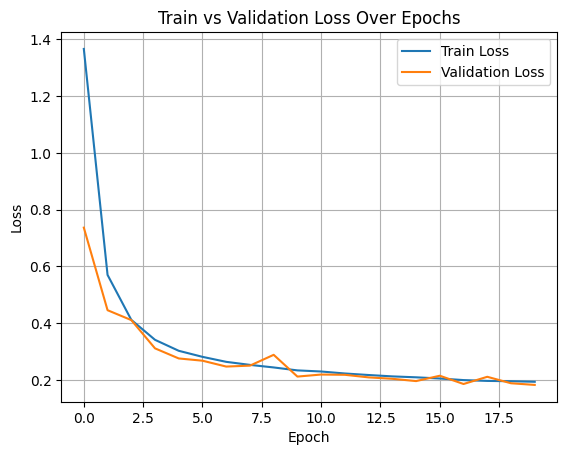

In [7]:
model = Conv_Classifier(proj_dim=8, classes=classes, lr=1e-3)

# print("Embeddings before Training")
# embeddings, labels = generate_embeddings(model, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_classifier_mnist_all", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(log_dir)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_supcontrast_mnist_all/version_2


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/1817539872484f668287a7c4af87075b

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                           | Type              | Params | Mode 
------------------------------------------------------------------------------
0  | encoder                        | ConvEncoder       | 696    | train
1  | encoder.layers                 | ModuleList        | 696    | train
2  | encoder.layers.0               | ConvUnit          | 96     | train
3  | encoder.layers.0.conv          | Conv2d            | 80     | train
4  | encoder.layers.0.bn            | BatchNorm2d       | 16     | train
5  | encoder.layers.0.activ         | ReLU              | 0      | train
6  | encoder.layers.0.pool          | MaxPool2d         | 0      | train
7  | encoder.layers.1               | ConvUnit          | 600    | train
8  | encoder.layers.1.conv          | Conv2d            | 584    | trai

Epoch 19: 100%|██████████| 938/938 [00:23<00:00, 40.16it/s, v_num=075b, valid_loss=0.614, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 938/938 [00:23<00:00, 40.15it/s, v_num=075b, valid_loss=0.614, train_loss=0.677]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_supcontrast_mnist_all
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/1817539872484f668287a7c4af87075b
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [20] : (0.6773943305015564, 0.8806864619255066)
COMET INFO:     valid_loss [20] : (0.609001100063324, 0.7555113434791565)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_supcontrast_mnist_all
COMET INFO:   Parameters:
COMET INFO:     activ_type         : relu
COMET INFO:     hidden_channel_num : 8
COMET INFO:     layer_num          : 2
COMET INFO:     loss

Embeddings after Training


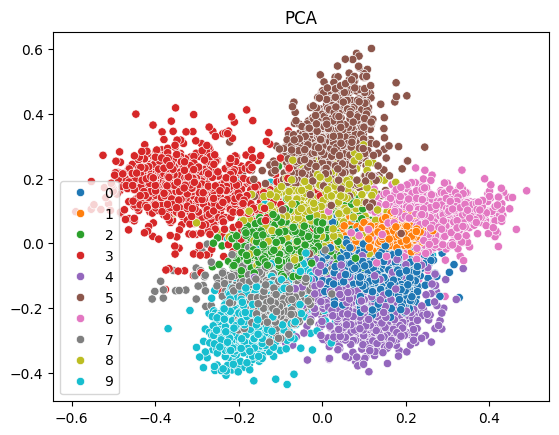

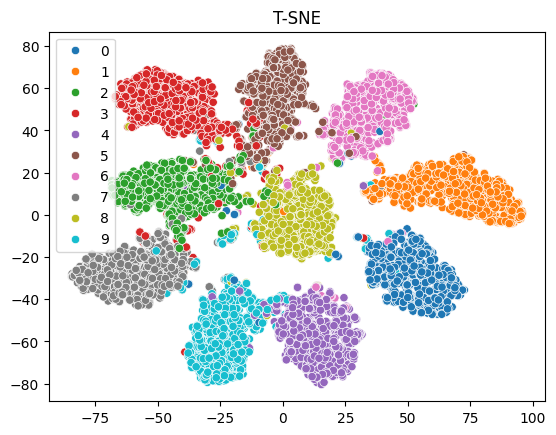

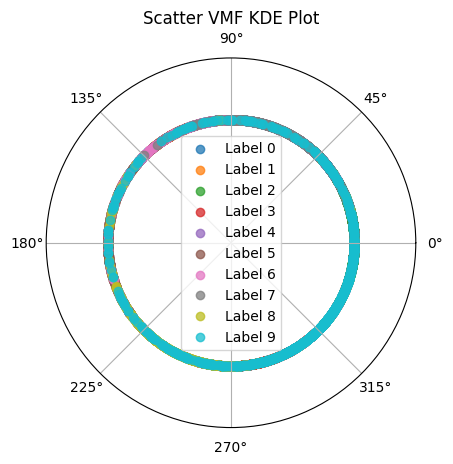

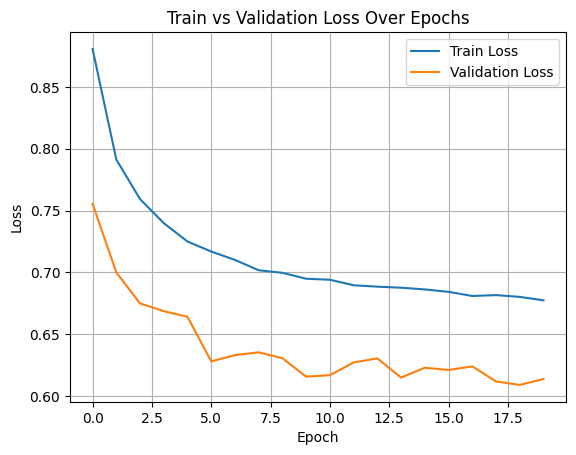

In [8]:
model = Conv_SupContrastive(proj_dim=8, lr=1e-3, loss="ContrastiveLoss")

# print("Embeddings before Training")
# embeddings, labels = generate_embeddings(model, val_loader)
# pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_supcontrast_mnist_all", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(log_dir)

In [9]:
linear_probe = LinearProbe(pretrained_model=model, classes=classes, num_layers=1)

trainer, log_dir = get_trainer("probing_supcontrast_mnist_all", monitor_metric="valid_loss")
trainer.fit(linear_probe, train_loader, val_loader)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/probing_supcontrast_mnist_all/version_1


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/fe18b8090aec4e4cb00458c8e9928a4c

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                                            | Type                | Params | Mode 
-------------------------------------------------------------------------------------------------
0  | pretrained_model                                | Conv_SupContrastive | 768    | eval 
1  | pretrained_model.encoder                        | ConvEncoder         | 696    | eval 
2  | pretrained_model.encoder.layers                 | ModuleList          | 696    | eval 
3  | pretrained_model.encoder.layers.0               | ConvUnit            | 96     | eval 
4  | pretrained_model.encoder.layers.0.conv          | Conv2d              | 80     | eval 
5  | pretrained_model.encoder.layers.0.bn            | BatchNorm2d         | 16     | eval 
6  | pretrained_model.encoder.layers.0.activ         | ReLU      

Epoch 19: 100%|██████████| 938/938 [00:14<00:00, 65.13it/s, v_num=8a4c, valid_loss=0.204, valid_acc=0.948, train_loss=0.224, train_acc=0.945]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 938/938 [00:14<00:00, 65.05it/s, v_num=8a4c, valid_loss=0.204, valid_acc=0.948, train_loss=0.224, train_acc=0.945]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : probing_supcontrast_mnist_all
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/fe18b8090aec4e4cb00458c8e9928a4c
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.5749833583831787, 0.9451000094413757)
COMET INFO:     train_loss [20] : (0.2236764281988144, 2.0391719341278076)
COMET INFO:     valid_acc [20]  : (0.8924999833106995, 0.9476000070571899)
COMET INFO:     valid_loss [20] : (0.2041519582271576, 1.7893421649932861)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : probing_supcontrast_mnist_all
COMET INF